In [1]:
!pip install gdal > /dev/null

In [2]:
import gdown
gdown.download("https://drive.google.com/file/d/1YUbTBFrk9QF0ivR5F640G3dhCMC3XQUZ/view?usp=sharing", "dataset.zip", quiet=False, fuzzy=True)
gdown.extractall("dataset.zip")

Downloading...
From (original): https://drive.google.com/uc?id=1YUbTBFrk9QF0ivR5F640G3dhCMC3XQUZ
From (redirected): https://drive.google.com/uc?id=1YUbTBFrk9QF0ivR5F640G3dhCMC3XQUZ&confirm=t&uuid=7b86a0f6-608b-4621-b7f1-698e9379ff72
To: /content/dataset.zip
100%|██████████| 1.70G/1.70G [00:23<00:00, 71.2MB/s]


['dataset/',
 'dataset/flooded/',
 'dataset/flooded/0.jpg',
 'dataset/flooded/1.jpg',
 'dataset/flooded/10.jpg',
 'dataset/flooded/100.jpg',
 'dataset/flooded/101.jpg',
 'dataset/flooded/102.jpg',
 'dataset/flooded/103.jpg',
 'dataset/flooded/104.jpg',
 'dataset/flooded/105.jpg',
 'dataset/flooded/106.jpg',
 'dataset/flooded/107.jpg',
 'dataset/flooded/108.jpg',
 'dataset/flooded/109.jpg',
 'dataset/flooded/11.jpg',
 'dataset/flooded/110.jpg',
 'dataset/flooded/111.jpg',
 'dataset/flooded/112.jpg',
 'dataset/flooded/113.jpg',
 'dataset/flooded/114.jpg',
 'dataset/flooded/115.jpg',
 'dataset/flooded/116.jpg',
 'dataset/flooded/117.jpg',
 'dataset/flooded/118.jpg',
 'dataset/flooded/119.jpg',
 'dataset/flooded/12.jpg',
 'dataset/flooded/120.jpg',
 'dataset/flooded/121.jpg',
 'dataset/flooded/122.jpg',
 'dataset/flooded/123.jpg',
 'dataset/flooded/124.jpg',
 'dataset/flooded/125.jpg',
 'dataset/flooded/126.jpg',
 'dataset/flooded/127.jpg',
 'dataset/flooded/128.jpg',
 'dataset/flooded/129

In [3]:
import pandas as pd
import numpy as np
import glob
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from osgeo import gdal

In [11]:
# Create an empty DataFrame with two columns: 'image_path' and 'label'
df = pd.DataFrame(columns=['image_path', 'label'])

# Iterate over each image file in the 'dataset/flooded/' directory
for image_path in sorted(glob.glob('dataset/flooded/*.jpg')):
    # Create a dictionary 'data' containing the image path and label ('flooded')
    data = {'image_path': image_path, 'label': 'flooded'}
    # Append the 'data' dictionary as a new row to the DataFrame 'df'
    df.loc[len(df)] = data

# Iterate over each image file in the 'dataset/non-flooded/' directory
for image_path in sorted(glob.glob('dataset/non-flooded/*.jpg')):
    # Create a dictionary 'data' containing the image path and label ('non-flooded')
    data = {'image_path': image_path, 'label': 'non-flooded'}
    # Append the 'data' dictionary as a new row to the DataFrame 'df'
    df.loc[len(df)] = data


In [12]:
df.head()

,image_path,label
0,dataset/flooded/0.jpg,flooded
1,dataset/flooded/1.jpg,flooded
2,dataset/flooded/10.jpg,flooded
3,dataset/flooded/100.jpg,flooded
4,dataset/flooded/101.jpg,flooded


In [13]:
print(f"Total number of instances in the dataset is: {len(df)}")
print(f"Total number of flooded instances in the dataset is: {len(df[df['label'] == 'flooded'])}")
print(f"Total number of non-flooded instances in the dataset is: {len(df[df['label'] == 'non-flooded'])}")

Total number of instances in the dataset is: 922
Total number of flooded instances in the dataset is: 461
Total number of non-flooded instances in the dataset is: 461


In [21]:
def countPlot(data=None, x=None, y=None, palette='bright', height=15, title=' ', subtitle=' ', description=' '):
    # Set seaborn style and figure size
    sns.set(style='whitegrid', rc={'figure.figsize': (20, height)})

    # Create a count plot
    g = sns.countplot(data=data, y=y, x=x, palette=palette)

    # Set labels and title
    g.set_ylabel(' \n\n\n')  # Empty spaces for better alignment
    g.set_xlabel(' \n\n\n\n\n')  # Empty spaces for better alignment
    g.set_title(f'\n\n\n\n{title}\n\n'.upper(), loc='left', fontdict=dict(fontsize=15, fontweight='bold'))

    # Format y-axis tick labels to title case
    g.set_yticklabels([tick_label.get_text().title() for tick_label in g.get_yticklabels()],
                      fontdict=dict(fontsize=12.5, fontweight='medium'))

    # Add description text
    plt.text(s=f'{description}',
             alpha=0.5,
             x=0,
             y=-.18,
             verticalalignment='baseline',
             horizontalalignment='left',
             transform=g.transAxes)

    # Add counts on top of bars
    g.bar_label(container=g.containers[0], padding=10)

    # Add space on the right for better layout
    plt.text(s=' ', x=1.08, y=1, transform=g.transAxes)

    # Remove spines
    sns.despine()

    return g

def piePlot(data=None, value='Percentage', name='Class', title=' ', subtitle=' ', description=' '):
    # Calculate percentage and create DataFrame
    data_pie = pd.DataFrame(data.value_counts() / data.shape[0]*100).reset_index()
    data_pie.columns = [name, value]

    # Create pie chart using Plotly
    fig = px.pie(data_pie, values=value, names=name, title=title)

    # Update layout and show the plot
    fig.update_layout(title=title, title_x=0.48)  # Adjust title alignment
    fig.show()


<ipython-input-21-1e5020782f8b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-1e5020782f8b>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



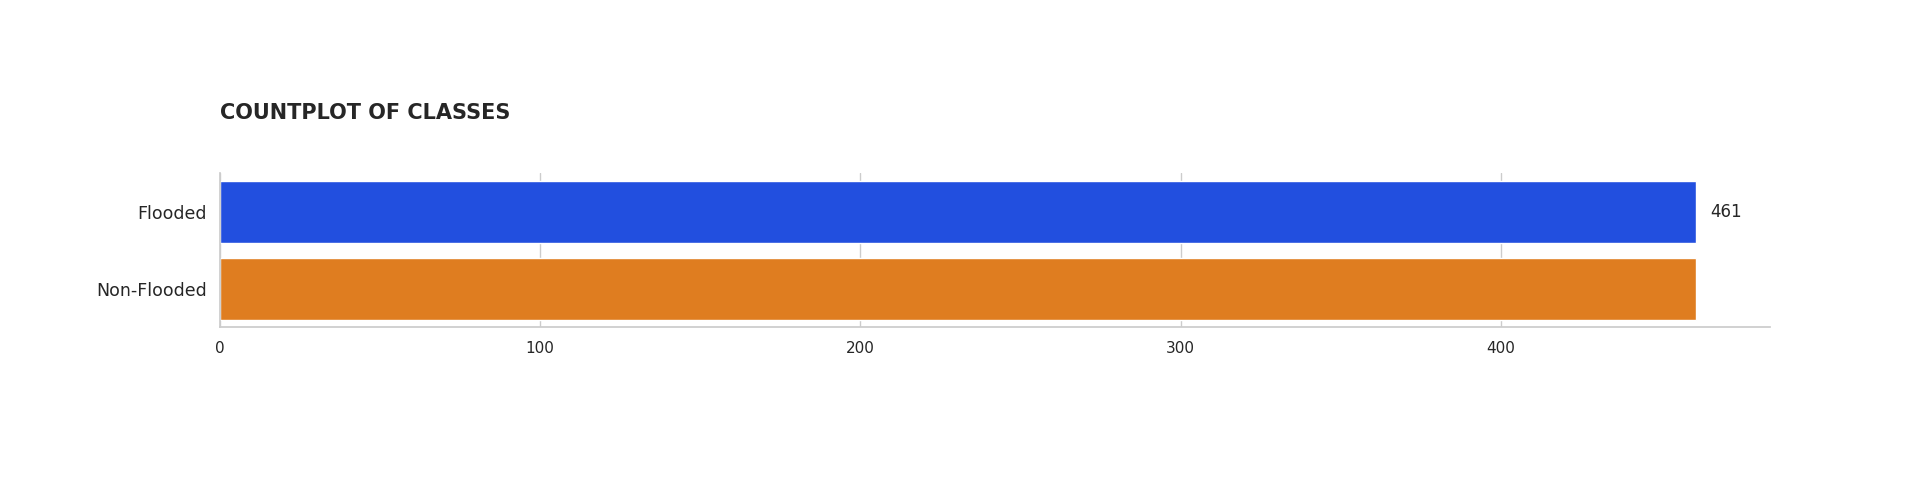

In [22]:
countPlot(y = df['label'], title = 'Countplot of Classes', height = df['label'].nunique())
piePlot(data = df['label'], value = 'Percentage', name = 'Class', title = 'Class Distribution')

In [23]:
img_ds = gdal.Open(df.iloc[555]['image_path'], gdal.GA_ReadOnly)
print ("Number of bands in the images is: " + str(img_ds.RasterCount))

Number of bands in the images is: 3


In [25]:
# Create an empty dictionary to store resolutions and their counts
resolutions = {}

# Iterate over each row in the DataFrame
for i in range(len(df)):
    # Read the image using OpenCV (cv2)
    image = cv2.imread(df.loc[i]['image_path'], cv2.IMREAD_COLOR)

    # Check if the shape of the image is already in the resolutions dictionary
    if image.shape not in resolutions:
        # If not, add it to the dictionary with count 1
        resolutions[image.shape] = 1
    else:
        # If it's already in the dictionary, increment its count
        resolutions[image.shape] += 1


In [26]:
# Sort the resolutions dictionary by value (count) in descending order
sorted_resolutions = dict(sorted(resolutions.items(), key=lambda x: x[1], reverse=True))

# Print the top 5 most common resolutions
print(dict(list(sorted_resolutions.items())[0:5]))


{(3000, 4000, 3): 270, (3072, 4592, 3): 47, (720, 1280, 3): 8, (360, 640, 3): 7, (230, 230, 3): 5}


In [27]:
# Initialize a variable to store the sum of resolutions counts
sum = 0

# Iterate over the keys of the sorted_resolutions dictionary
for key in sorted_resolutions.keys():
    # Add the count associated with the current resolution to the sum
    sum += sorted_resolutions[key]

# Assert that the total count of resolutions matches the number of rows in the DataFrame
assert sum == len(df)


In [28]:
# Initialize a numpy array to store the sum of image sizes weighted by their counts
average_image_size = np.zeros((1, 3))

# Iterate over the keys of the sorted_resolutions dictionary
for key in sorted_resolutions.keys():
    # Multiply the resolution by its count and add it to the average_image_size
    average_image_size += key * np.full((1, 3), sorted_resolutions[key])

# Divide the sum by the total number of images to calculate the average image size
average_image_size /= len(df)

# Print the rounded average image size as integers
print(np.round(average_image_size).astype(int))


[[1352 1794    3]]
